# San Francisco Forecast

![](https://images.unsplash.com/photo-1449034446853-66c86144b0ad?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w=1050&q=80)

In this exercise, you will predict the weather of the city of San Francisco! In the first step, we would predict the temperature, knowing the information of the past days.

First load the dataset contained in `San_Francisco.csv`.

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [76]:
# TODO: Load the dataset
dataset = pd.read_csv('San_Francisco.csv', parse_dates=[0])

In [77]:
dataset.shape

(45253, 7)

Explore the dataset, make the data preparation.

In [78]:
# TODO: Make an EDA and data preparation

In [79]:
dataset.isna().sum()

datetime            0
Humidity          942
Pressure          815
Temperature       793
Description       793
Wind direction    794
Wind speed        794
dtype: int64

In [80]:
dataset = dataset.dropna(axis=0).reset_index(drop=True)

In [81]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44304 entries, 0 to 44303
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   datetime        44304 non-null  datetime64[ns]
 1   Humidity        44304 non-null  float64       
 2   Pressure        44304 non-null  float64       
 3   Temperature     44304 non-null  float64       
 4   Description     44304 non-null  object        
 5   Wind direction  44304 non-null  float64       
 6   Wind speed      44304 non-null  float64       
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 2.4+ MB


In [82]:
px.line(dataset, 'datetime', 'Temperature')

In [83]:
dataset.Description.value_counts()

sky is clear                        12614
mist                                 8027
broken clouds                        4001
few clouds                           3811
scattered clouds                     3765
light rain                           3396
haze                                 2888
overcast clouds                      2360
moderate rain                        1057
fog                                   916
smoke                                 377
heavy intensity rain                  257
light intensity drizzle               187
proximity shower rain                 173
thunderstorm                          102
proximity thunderstorm                 90
drizzle                                71
thunderstorm with light rain           51
heavy snow                             49
thunderstorm with rain                 28
thunderstorm with heavy rain           24
proximity thunderstorm with rain       13
very heavy rain                        11
squalls                           

In [84]:
to_dummify = ['Description']

In [85]:
dataset_wo_desc = dataset.drop('Description', axis=1)

In [86]:
desc_dummies = pd.get_dummies(dataset[to_dummify], drop_first=True)

In [87]:
dataset_full = pd.concat([dataset_wo_desc, desc_dummies], axis=1) 

In [88]:
dataset_full

,datetime,Humidity,Pressure,Temperature,Wind direction,Wind speed,Description_drizzle,Description_few clouds,Description_fog,Description_haze,Description_heavy intensity drizzle,Description_heavy intensity rain,Description_heavy snow,Description_light intensity drizzle,Description_light intensity shower rain,Description_light rain,Description_light snow,Description_mist,Description_moderate rain,Description_overcast clouds,Description_proximity shower rain,Description_proximity thunderstorm,Description_proximity thunderstorm with rain,Description_scattered clouds,Description_shower rain,Description_sky is clear,Description_smoke,Description_squalls,Description_thunderstorm,Description_thunderstorm with heavy rain,Description_thunderstorm with light rain,Description_thunderstorm with rain,Description_very heavy rain
0,2012-10-01 13:00:00,88.0,1009.0,289.480000,150.0,2.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2012-10-01 14:00:00,87.0,1009.0,289.474993,147.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,2012-10-01 15:00:00,86.0,1009.0,289.460618,141.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,2012-10-01 16:00:00,85.0,1009.0,289.446243,135.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,2012-10-01 17:00:00,84.0,1009.0,289.431869,129.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44299,2017-10-27 20:00:00,28.0,1015.0,297.060000,277.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
44300,2017-10-27 21:00:00,25.0,1014.0,299.140000,0.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
44301,2017-10-27 22:00:00,22.0,1014.0,300.560000,0.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
44302,2017-10-27 23:00:00,20.0,1013.0,301.060000,120.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


As you did for the stock forecast, you will need to compute the `X` and `y` data.

`X` will be all the features, of the past half day for example (the number of past days can be modified). `y` will be the temperature of the current day.

In [92]:
# TODO: Compute X and y
def create_dataset(dataset, target, period=12):
    dataset = dataset.drop('datetime', axis=1).reset_index(drop=True)
    X = []
    y = []
    for i in range(len(dataset)-period):
        X.append(dataset.iloc[i:i+period,:].values)
        y.append(dataset.loc[:,target][i+period])
    X = np.array(X)
    y = np.array(y)
    return X, y

In [93]:
X, y = create_dataset(dataset_wo_desc, 'Temperature')

In [94]:
X.shape

(44292, 12, 5)

In [95]:
y.shape

(44292,)

Now build a RNN model that will allow to predict the temperature, knowing the information of the past half day (or more if you chose more!).

Then compile it, fit it on a train dataset.

In [102]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [98]:
# TODO: Build and fit a RNN model
def my_RNN():

  model = Sequential()

  model.add(GRU(units=12, activation='relu', return_sequences=True))
  model.add(GRU(units=12, activation='relu', return_sequences=False))
  model.add(Dense(units=1, activation='linear'))

  return model

In [108]:
callbacks = [EarlyStopping(patience=5, restore_best_weights=True)]

In [99]:
model = my_RNN()

In [105]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [101]:
X_train = X[:round(0.8*X.shape[0])]
y_train = y[:round(0.8*X.shape[0])]
X_test = X[round(0.8*X.shape[0]):]
y_test = y[round(0.8*X.shape[0]):]

In [109]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1000, batch_size=128, callbacks=callbacks)

Epoch 1/1000
277/277 [==============================] - 23s 83ms/step - loss: 18.2657 - val_loss: 20.4901
Epoch 2/1000
277/277 [==============================] - 23s 84ms/step - loss: 16.8708 - val_loss: 17.9998
Epoch 3/1000
277/277 [==============================] - 23s 84ms/step - loss: 15.5827 - val_loss: 16.8873
Epoch 4/1000
277/277 [==============================] - 23s 84ms/step - loss: 14.6267 - val_loss: 15.8305
Epoch 5/1000
277/277 [==============================] - 23s 84ms/step - loss: 13.5789 - val_loss: 14.3194
Epoch 6/1000
277/277 [==============================] - 23s 84ms/step - loss: 12.5663 - val_loss: 14.4655
Epoch 7/1000
277/277 [==============================] - 23s 82ms/step - loss: 11.8173 - val_loss: 12.3341
Epoch 8/1000
277/277 [==============================] - 23s 83ms/step - loss: 11.7107 - val_loss: 11.5324
Epoch 9/1000
277/277 [==============================] - 23s 84ms/step - loss: 9.8149 - val_loss: 11.3972
Epoch 10/1000
277/277 [========================

Finally, plot the results and compare it to the test data.

In [110]:
y_pred = model.predict(X_test)

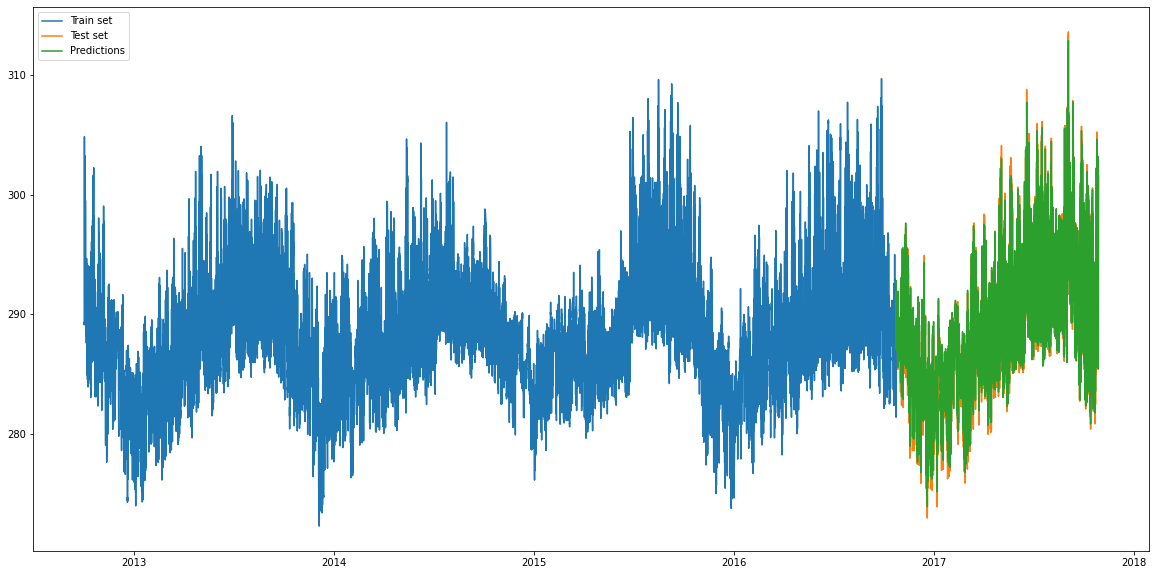

In [115]:
# TODO: Plot the results
plt.figure(figsize=(20,10))
plt.plot(dataset_wo_desc.datetime[12:X_train.shape[0]+12], y_train, label='Train set')
plt.plot(dataset_wo_desc.datetime[X_train.shape[0]+12:], y_test, label='Test set')
plt.plot(dataset_wo_desc.datetime[X_train.shape[0]+12:], y_pred, label='Predictions')
plt.legend()
plt.show()

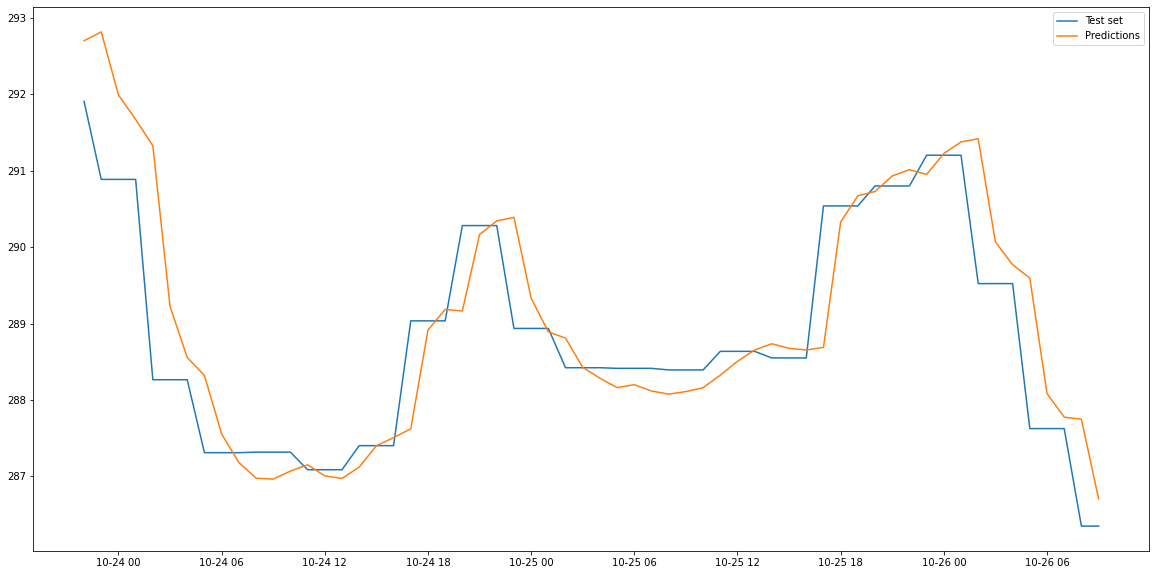

In [118]:
plt.figure(figsize=(20,10))
plt.plot(dataset_wo_desc.datetime[X_train.shape[0]+12:X_train.shape[0]+72], y_test[:60], label='Test set')
plt.plot(dataset_wo_desc.datetime[X_train.shape[0]+12:X_train.shape[0]+72], y_pred[:60], label='Predictions')
plt.legend()
plt.show()

To go further, you can of course tune hyperparameters and the number of previous time steps you use.

You can also try to add information from other cities (coming from [that dataset](https://www.kaggle.com/selfishgene/historical-hourly-weather-data)). 

Finally, you can also try to handle carefully the missing data, if you did not already!